## Import Dependencies and libraries

In [1]:
import numpy as np
import glob
import tkinter as tk
from tkinter import filedialog
import matplotlib.pyplot as plt
import datetime, calendar

# Reading septentrio file and concatenate

In [2]:
root = tk.Tk()
root.withdraw()
#chose day folder 
file_path = filedialog.askdirectory()

In [3]:
path = file_path+'/*.ismr'
files = glob.glob(path)
files

['/media/bhuvi/Analysis/GNSS/2021/21030/SEPT030A.21_.ismr',
 '/media/bhuvi/Analysis/GNSS/2021/21030/SEPT030B.21_.ismr',
 '/media/bhuvi/Analysis/GNSS/2021/21030/SEPT030C.21_.ismr',
 '/media/bhuvi/Analysis/GNSS/2021/21030/SEPT030D.21_.ismr',
 '/media/bhuvi/Analysis/GNSS/2021/21030/SEPT030E.21_.ismr',
 '/media/bhuvi/Analysis/GNSS/2021/21030/SEPT030F.21_.ismr',
 '/media/bhuvi/Analysis/GNSS/2021/21030/SEPT030G.21_.ismr',
 '/media/bhuvi/Analysis/GNSS/2021/21030/SEPT030H.21_.ismr',
 '/media/bhuvi/Analysis/GNSS/2021/21030/SEPT030I.21_.ismr',
 '/media/bhuvi/Analysis/GNSS/2021/21030/SEPT030J.21_.ismr',
 '/media/bhuvi/Analysis/GNSS/2021/21030/SEPT030K.21_.ismr',
 '/media/bhuvi/Analysis/GNSS/2021/21030/SEPT030L.21_.ismr',
 '/media/bhuvi/Analysis/GNSS/2021/21030/SEPT030M.21_.ismr',
 '/media/bhuvi/Analysis/GNSS/2021/21030/SEPT030N.21_.ismr',
 '/media/bhuvi/Analysis/GNSS/2021/21030/SEPT030O.21_.ismr',
 '/media/bhuvi/Analysis/GNSS/2021/21030/SEPT030P.21_.ismr',
 '/media/bhuvi/Analysis/GNSS/2021/21030/

### Checking if all files exist

In [4]:
import os.path
import string
Folder_name= file_path[-5:]
print('Checking Folder: '+ Folder_name)
for filename in os.listdir(file_path):
    if filename.startswith(tuple("SEPT{doy}{hour_chr}.{year}_.ismr".format(doy=file_path[-3:],hour_chr=chr(i),year=file_path[-5:-3])  for i in range(65,91))) :
        print(filename +"=> File exist")
    else:
        print ("=X> File not exist")
        
        
        #print(filename)


Checking Folder: 21030
SEPT030A.21_.ismr=> File exist
SEPT030B.21_.ismr=> File exist
SEPT030C.21_.ismr=> File exist
SEPT030D.21_.ismr=> File exist
SEPT030E.21_.ismr=> File exist
SEPT030F.21_.ismr=> File exist
SEPT030G.21_.ismr=> File exist
SEPT030H.21_.ismr=> File exist
SEPT030I.21_.ismr=> File exist
SEPT030J.21_.ismr=> File exist
SEPT030K.21_.ismr=> File exist
SEPT030L.21_.ismr=> File exist
SEPT030M.21_.ismr=> File exist
SEPT030N.21_.ismr=> File exist
SEPT030O.21_.ismr=> File exist
SEPT030P.21_.ismr=> File exist
SEPT030Q.21_.ismr=> File exist
SEPT030R.21_.ismr=> File exist
SEPT030S.21_.ismr=> File exist
SEPT030T.21_.ismr=> File exist
SEPT030U.21_.ismr=> File exist
SEPT030V.21_.ismr=> File exist
SEPT030W.21_.ismr=> File exist
SEPT030X.21_.ismr=> File exist


In [5]:
with open("concated_{Folder_name}.ismr".format(Folder_name=file_path[-5:]), "w") as outfile:
    for filename in files:
        with open(filename) as infile:
            contents = infile.read()
            outfile.write(contents)


In [6]:
!pwd

/home/bhuvi/PhD_Docs


# ISMR Data Processing

In [7]:
#import ismrpy


#data = ismrpy.read_ismr(filename = "/home/bhuvi/PhD_Docs/concated_21011.ismr",lat='22.5286469',lon='75.9236699',addition=True, Ipp=350, skiprows=None)

In [8]:
import pandas as pd
import datetime, calendar

In [9]:
data= pd.read_csv("concated_{Folder_name}.ismr".format(Folder_name=file_path[-5:]),header=None) #import concated file of the day

In [10]:
data.columns=['WN','TOW','SVID', 'Value', 'Azimuth', 'Elevation', 'Sig1', 'Total_S4_Sig1',
       'Correction_total_S4_Sig1', 'Phi01_Sig1_1', 'Phi03_Sig1_3',
       'Phi10_Sig1_10', 'Phi30_Sig1_30', 'Phi60_Sig1_60',
       'AvgCCD_Sig1_average_code-carrier_divergence',
       'SigmaCCD_Sig1_standard_deviation_code-carrier_divergence',
       'TEC_TOW-45s', 'dTEC_TOW-60s_TOW-45s', 'TEC_TOW-30s',
       'dTEC_TOW-45s_TOW-30s', 'TEC_TOW-15s', 'dTEC_TOW-30s_TOW-15s',
       'TEC_TOW', 'dTEC_TOW-15s_TOW', 'Sig1_lock_time',
       'sbf2ismr_version_number', 'Lock_time_second_frequency_TEC',
       'Averaged_C/N0_second_frequency_TEC_computation', 'SI_Index_Sig1',
       'SI_Index_Sig1_numerator', 'p_Sig1_spectral_slope', 'Average_Sig2_C/N0',
       'Total_S4_Sig2', 'Correction_total_S4_Sig2', 'Phi01_Sig2_1',
       'Phi03_Sig2_3', 'Phi10_Sig2_10', 'Phi30_Sig2_30', 'Phi60_Sig2_60',
       'AvgCCD_Sig2_average_code-carrier_divergence', 'SigmaCCD_Sig2_standard',
       'Sig2_lock', 'SI_Index_Sig2', 'SI_Index_Sig2_numerator', 'p_Sig2_phase',
       'Average_Sig3_C/N0_last_minute', 'Total_S4_Sig3',
       'Correction_total_S4_Sig3', 'Phi01_Sig3_1_phase', 'Phi03_Sig3_3_phase',
       'Phi10_Sig3_10_phase', 'Phi30_Sig3_30_phase', 'Phi60_Sig3_60_phase',
       'AvgCCD_Sig3_average_code-carrier_divergence',
       'SigmaCCD_Sig3_standard_deviation_code-carrier_divergence',
       'Sig3_lock_time', 'SI_Index_Sig3', 'SI_Index_Sig3_numerator',
       'p_Sig3_phase', 'T_Sig1_phase', 'T_Sig2_phase', 'T_Sig3_phase']

In [11]:
data

,WN,TOW,SVID,Value,Azimuth,Elevation,Sig1,Total_S4_Sig1,Correction_total_S4_Sig1,Phi01_Sig1_1,...,Phi60_Sig3_60_phase,AvgCCD_Sig3_average_code-carrier_divergence,SigmaCCD_Sig3_standard_deviation_code-carrier_divergence,Sig3_lock_time,SI_Index_Sig3,SI_Index_Sig3_numerator,p_Sig3_phase,T_Sig1_phase,T_Sig2_phase,T_Sig3_phase
0,2142,518460,8,628,306.0,12.0,38.4,0.116,0.121,0.039,...,nan,nan,nan,nan,nan,nan,nan,0.000214,nan,nan
1,2142,518460,10,628,1.0,48.0,48.4,0.055,0.038,0.018,...,0.019,-1.142,0.018,7312,0.009,0.986,1.68,0.000043,0.000072,0.000034
2,2142,518460,18,628,132.0,46.0,45.7,0.053,0.052,0.016,...,nan,nan,nan,nan,nan,nan,nan,0.000033,0.000044,nan
3,2142,518460,20,628,55.0,44.0,45.7,0.075,0.052,0.018,...,nan,nan,nan,nan,nan,nan,nan,0.000038,nan,nan
4,2142,518460,23,628,48.0,40.0,45.0,0.057,0.057,0.017,...,nan,nan,nan,nan,nan,nan,nan,0.000036,nan,nan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44551,2143,0,130,628,100.0,16.0,40.0,0.162,0.100,nan,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
44552,2143,0,132,628,140.0,57.0,44.1,0.063,0.063,0.060,...,nan,nan,nan,nan,nan,nan,nan,0.000156,0.000188,nan
44553,2143,0,136,628,262.0,9.0,37.6,0.180,0.132,0.119,...,nan,nan,nan,nan,nan,nan,nan,0.001489,0.000883,nan
44554,2143,0,137,628,107.0,28.0,37.9,0.142,0.128,0.057,...,nan,nan,nan,nan,nan,nan,nan,0.000195,nan,nan


In [12]:
data

,WN,TOW,SVID,Value,Azimuth,Elevation,Sig1,Total_S4_Sig1,Correction_total_S4_Sig1,Phi01_Sig1_1,...,Phi60_Sig3_60_phase,AvgCCD_Sig3_average_code-carrier_divergence,SigmaCCD_Sig3_standard_deviation_code-carrier_divergence,Sig3_lock_time,SI_Index_Sig3,SI_Index_Sig3_numerator,p_Sig3_phase,T_Sig1_phase,T_Sig2_phase,T_Sig3_phase
0,2142,518460,8,628,306.0,12.0,38.4,0.116,0.121,0.039,...,nan,nan,nan,nan,nan,nan,nan,0.000214,nan,nan
1,2142,518460,10,628,1.0,48.0,48.4,0.055,0.038,0.018,...,0.019,-1.142,0.018,7312,0.009,0.986,1.68,0.000043,0.000072,0.000034
2,2142,518460,18,628,132.0,46.0,45.7,0.053,0.052,0.016,...,nan,nan,nan,nan,nan,nan,nan,0.000033,0.000044,nan
3,2142,518460,20,628,55.0,44.0,45.7,0.075,0.052,0.018,...,nan,nan,nan,nan,nan,nan,nan,0.000038,nan,nan
4,2142,518460,23,628,48.0,40.0,45.0,0.057,0.057,0.017,...,nan,nan,nan,nan,nan,nan,nan,0.000036,nan,nan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44551,2143,0,130,628,100.0,16.0,40.0,0.162,0.100,nan,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
44552,2143,0,132,628,140.0,57.0,44.1,0.063,0.063,0.060,...,nan,nan,nan,nan,nan,nan,nan,0.000156,0.000188,nan
44553,2143,0,136,628,262.0,9.0,37.6,0.180,0.132,0.119,...,nan,nan,nan,nan,nan,nan,nan,0.001489,0.000883,nan
44554,2143,0,137,628,107.0,28.0,37.9,0.142,0.128,0.057,...,nan,nan,nan,nan,nan,nan,nan,0.000195,nan,nan


In [13]:
##some functions
def PRN_X(x):
    sv = 'M' + str(x)
    if 0 < x < 38:
        sv = 'G' + str(x)
    elif 37 < x < 62:
        sv = 'R' + str(x)
    elif 70 < x < 107:
        if len(str(x)) > 2:
            x = str(x)[-2:]
        sv = 'E' + str(x)
    elif 119 < x < 139:
        if len(str(x)) > 2:
            x = str(x)[-2:]
        sv = 'S' + str(x)
    elif 140 < x < 177:
        if len(str(x)) > 2:
            x = str(x)[-2:]
        sv = 'C' + str(x)
    elif 181 < x < 187:
        if len(str(x)) > 2:
            x = str(x)[-2:]
        sv = 'J' + str(x)
    return sv


###==============================================###
###
def WN_TOWtoTIME(WN, TOW):
    """"
    Convert gpsweek and gpseconds to time
    """
    import datetime, calendar
    WN = float(WN)
    TOW = float(TOW)
    # print(gpsweek,gpsseconds)
    leapseconds = 0   ####check 
    datetimeformat = "%Y-%m-%d %H:%M:%S"
    epoch = datetime.datetime.strptime("1980-01-06 00:00:00", datetimeformat)
    elapsed = datetime.timedelta(days=(WN * 7), seconds=(TOW))
    # return datetime.datetime.strftime(epoch + elapsed,datetimeformat)
    return elapsed + epoch


In [14]:
data['sv'] = data.SVID.apply(PRN_X)

In [15]:
data['sv']

0          G8
1         G10
2         G18
3         G20
4         G23
         ... 
44551     S30
44552     S32
44553     S36
44554     S37
44555    M140
Name: sv, Length: 44556, dtype: object

In [16]:
data['Time']=np.vectorize(WN_TOWtoTIME)(data['WN'],data['TOW'])

# Categorizing

In [17]:
data_gps = data.loc[data['SVID'].between(1,37,inclusive =True)]

data_glonass = data.loc[data['SVID'].between(38,61,inclusive =True)]

data_gallileo = data.loc[data['SVID'].between(71,106,inclusive =True)]


data_SBAS = data.loc[data['SVID'].between(120,138,inclusive =True)]


data_compass = data.loc[data['SVID'].between(140,176,inclusive =True)]


data_Qzss = data.loc[data['SVID'].between(181,187,inclusive =True)]

/tmp/ipykernel_223396/2991110376.py:1: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  data_gps = data.loc[data['SVID'].between(1,37,inclusive =True)]
/tmp/ipykernel_223396/2991110376.py:3: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  data_glonass = data.loc[data['SVID'].between(38,61,inclusive =True)]
/tmp/ipykernel_223396/2991110376.py:5: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  data_gallileo = data.loc[data['SVID'].between(71,106,inclusive =True)]
/tmp/ipykernel_223396/2991110376.py:8: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  data_SBAS = data.loc[data['SVID'].between(120,138,inclusive =True)]
/tmp/ipykernel_223396/2991110376.py:11: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or 

# Scintillation Index

(array([18657.   , 18657.125, 18657.25 , 18657.375, 18657.5  , 18657.625,
        18657.75 , 18657.875, 18658.   ]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

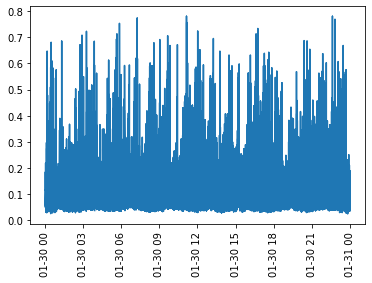

In [31]:
S4=data_gps.Total_S4_Sig1.astype(float)
plt.plot(data_gps.Time,S4)
plt.xticks(rotation=90)

In [27]:
max_S4_of_day=max(data_gps.Total_S4_Sig1)

# IPP Calculation

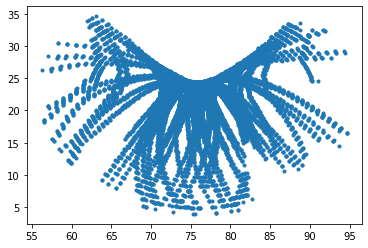

In [23]:
#receiver station location (lat, lon)
lat=22.5286469
lon=75.9236699

#satelite position
ELEV = data_gps.Elevation
AZI = data_gps.Azimuth

#constant values
RE = 6378.1363 * 10 ** 3  # Earth radius in meter
IPP = 350 * 10 ** 3       #ionosphere hight
######################
E = np.deg2rad(ELEV)
A = np.deg2rad(AZI)
PHI_U = np.deg2rad(lat)
LAMBDA_U = np.deg2rad(lon)
Iono_ht = ((RE / (RE + IPP)) * np.cos(E))
Shi_pp = (np.pi / 2) - E - np.arcsin(Iono_ht)
# % ---------------------------Satellite latitude and IPP Lat calculation
Phi_pp = np.sin(PHI_U) * np.cos(Shi_pp) + np.cos(PHI_U) * np.sin(Shi_pp) * np.cos(A)
DLat_PP = np.rad2deg(Phi_pp)
# %---------------------- Satellite longitude calculation
TERM2 = ((np.sin(Shi_pp) * np.sin(A)) / np.cos(Phi_pp))
Lambda_pp = LAMBDA_U + np.arcsin(TERM2)
DLong_PP = np.rad2deg(Lambda_pp)

data['Dlat_IPP'] = DLat_PP
data['Dlong_IPP'] = DLong_PP


#ipp plot
plt.plot(DLong_PP,DLat_PP,'.')

In [20]:
data

,WN,TOW,SVID,Value,Azimuth,Elevation,Sig1,Total_S4_Sig1,Correction_total_S4_Sig1,Phi01_Sig1_1,...,SI_Index_Sig3,SI_Index_Sig3_numerator,p_Sig3_phase,T_Sig1_phase,T_Sig2_phase,T_Sig3_phase,sv,Time,Dlat_IPP,Dlong_IPP
0,2142,518460,8,628,306.0,12.0,38.4,0.116,0.121,0.039,...,nan,nan,nan,0.000214,nan,nan,G8,2021-01-30 00:01:00,27.015137,66.861909
1,2142,518460,10,628,1.0,48.0,48.4,0.055,0.038,0.018,...,0.009,0.986,1.68,0.000043,0.000072,0.000034,G10,2021-01-30 00:01:00,24.357806,75.974042
2,2142,518460,18,628,132.0,46.0,45.7,0.053,0.052,0.016,...,nan,nan,nan,0.000033,0.000044,nan,G18,2021-01-30 00:01:00,20.188389,78.150444
3,2142,518460,20,628,55.0,44.0,45.7,0.075,0.052,0.018,...,nan,nan,nan,0.000038,nan,nan,G20,2021-01-30 00:01:00,23.514360,78.608943
4,2142,518460,23,628,48.0,40.0,45.0,0.057,0.057,0.017,...,nan,nan,nan,0.000036,nan,nan,G23,2021-01-30 00:01:00,24.032995,78.715409
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44551,2143,0,130,628,100.0,16.0,40.0,0.162,0.100,nan,...,nan,nan,nan,nan,nan,nan,S30,2021-01-31 00:00:00,20.391659,84.668737
44552,2143,0,132,628,140.0,57.0,44.1,0.063,0.063,0.060,...,nan,nan,nan,0.000156,0.000188,nan,S32,2021-01-31 00:00:00,20.585457,77.238548
44553,2143,0,136,628,262.0,9.0,37.6,0.180,0.132,0.119,...,nan,nan,nan,0.001489,0.000883,nan,S36,2021-01-31 00:00:00,20.031419,63.730321
44554,2143,0,137,628,107.0,28.0,37.9,0.142,0.128,0.057,...,nan,nan,nan,0.000195,nan,nan,S37,2021-01-31 00:00:00,20.467884,81.204923


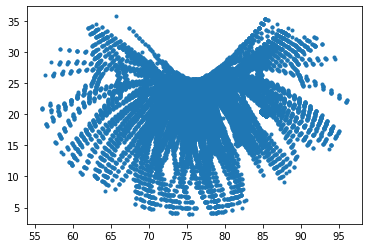

In [21]:
plt.plot(DLong_PP,DLat_PP,'.')